<font size=6><b>Lec01. boston DL
* ML RMSE : RMSE:0.2024 
* DL RMSE : RMSE:0.2528

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston


#------------------------------------------------------------------ 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [25]:
np.random.seed(1234)

import tensorflow as tf
tf.random.set_seed(1234)

# Data Load

In [2]:
dataset = load_boston()
df = pd.DataFrame(data=dataset["data"], columns = dataset["feature_names"])
df['price'] = dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 전처리 & 가공

## log 변환

In [4]:
df['log_price'] = np.log1p(df['price'])

In [5]:
y_log = df["log_price"]
X = df.drop(["price", "log_price"], axis=1)

## 스케일링

In [6]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X[['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])
#-------------X_scaler_df ------------------------
X_scaler_df['CHAS'] = X["CHAS"]
X_scaler_df.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.0
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.0
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.0


## 아웃라아어
* 주요coef_ : LSTAE 2rows 아웃라이어 삭제 

In [7]:
X_scaler_df.drop([374, 414], axis=0, inplace=True)
y_log = y_log.drop([374, 414])

In [8]:
X_scaler_df.shape, y_log.shape

((504, 13), (504,))

In [9]:
X_scaler_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.0
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.0
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.0


In [10]:
y_log[:5]

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: log_price, dtype: float64

# 모델 

In [14]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [16]:
model = Sequential()
model.add(Dense(units=12,  activation='relu',  input_dim=13))   #--------------- input_dim == 피쳐갯수
model.add(Dense(units=20 , activation='relu'))
model.add(Dense(units=40 , activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=80 , activation='relu'))
model.add(Dense(units=60 , activation='relu'))
model.add(Dense(units=20 , activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(units=1 , activation='sigmoid'))              #--------------- 이진분류
# model.add(Dense(units=3 , activation='softmax'))              #--------------- 멀티분류
model.add(Dense(units=1 ))   


# model.compile(optimizer='adam',              
#             loss='root_mean_squared_error')   #-------------- 에러


#---------------------- by 손보영 ------------------------------
# model.compile(optimizer='adam'
#               , loss='mean_squared_error' 
#               , metrics =[tensorflow.keras.metrics.RootMeanSquaredError(name='rmse')]
#              )

model.compile(optimizer='adam'
              ,loss="mean_squared_error"
              # ,metrics=[tensorflow.keras.metrics.mean_squared_error]
             ) 

# train test  분리

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaler_df, y_log, 
                                                  test_size=0.2, random_state=1234,  shuffle=False)
print(X_train.shape, X_val.shape)

(403, 13) (101, 13)


In [18]:
fit_res = model.fit(X_train, y_train 
                  #, batch_size=15
                  , epochs=100
                  , validation_data=(X_val, y_val)
                 )

res = model.evaluate(X_val, y_val)
print(f"{res}")

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 9.1235 - val_loss: 4.5328
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 4.8858 - val_loss: 1.7061
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 4.0561 - val_loss: 1.0663
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 2.5580 - val_loss: 1.4447
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 2.0126 - val_loss: 0.8749
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 2.1562 - val_loss: 0.7849
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9777 - val_loss: 0.7097
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 2.0184 - val_loss: 0.5752
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 1.6347 - val_loss: 0.4782
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 1.6648 - val_loss: 0.4408
Epoch 1

# 평가 & 검증

In [21]:
print(f"RMSE : {np.sqrt(0.06391679495573044):.4f}")

RMSE : 0.2528


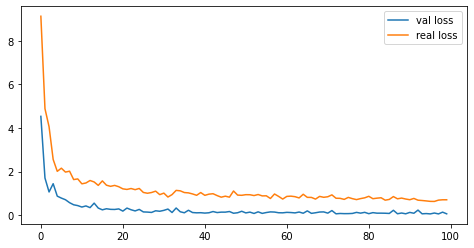

In [24]:
plt.figure(figsize=(8,4))
vloss = fit_res.history["val_loss"]
loss = fit_res.history["loss"]
plt.plot(range(100),vloss , label="val loss")
plt.plot(range(100),loss  , label="real loss")
plt.legend()
plt.show()